PandasDataReaderをインストール

In [2]:
!pip install pandas_datareader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 622.3 kB/s eta 0:00:00MB/s eta 0:00:01


データ分析（pandas）とグラフィック化（matplotlib）をインストール

In [5]:
from pandas_datareader import data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Y!ファイナンスから日経225を取得

In [13]:
!pip install yfinance

import yfinance as yf

start = '2023-04-20'
end = '2024-04-20'

yf.pdr_override()
df = data.get_data_yahoo('^N225', start, end)

[*********************100%%**********************]  1 of 1 completed


サンプルとして10件を取得

In [14]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-20,28472.000000,28694.250000,28442.449219,28657.570312,28657.570312,56700000
2023-04-21,28590.550781,28778.369141,28527.800781,28564.369141,28564.369141,61400000
2023-04-24,28631.779297,28680.650391,28567.240234,28593.519531,28593.519531,50000000
2023-04-25,28697.730469,28806.689453,28609.769531,28620.070312,28620.070312,59300000
2023-04-26,28478.519531,28551.609375,28319.769531,28416.470703,28416.470703,68700000
2023-04-27,28340.589844,28459.730469,28241.669922,28457.679688,28457.679688,73600000
2023-04-28,28705.910156,28879.240234,28499.509766,28856.439453,28856.439453,104000000
2023-05-01,29058.050781,29145.890625,29016.830078,29123.179688,29123.179688,73400000
2023-05-02,29278.800781,29278.800781,29083.130859,29157.949219,29157.949219,63900000


キーとなっている値を表示確認する

In [15]:
df.index

DatetimeIndex(['2023-04-20', '2023-04-21', '2023-04-24', '2023-04-25',
               '2023-04-26', '2023-04-27', '2023-04-28', '2023-05-01',
               '2023-05-02', '2023-05-08',
               ...
               '2024-04-08', '2024-04-09', '2024-04-10', '2024-04-11',
               '2024-04-12', '2024-04-15', '2024-04-16', '2024-04-17',
               '2024-04-18', '2024-04-19'],
              dtype='datetime64[ns]', name='Date', length=246, freq=None)

とりあえずグラフ化

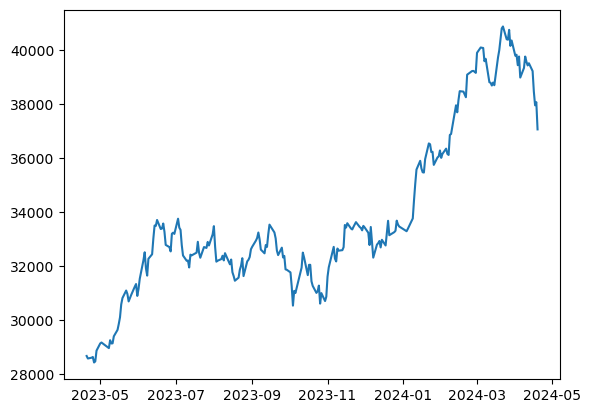

In [32]:
date=df.index
price=df['Adj Close']
plt.plot(date,price)

グラフをもう少し見やすくする

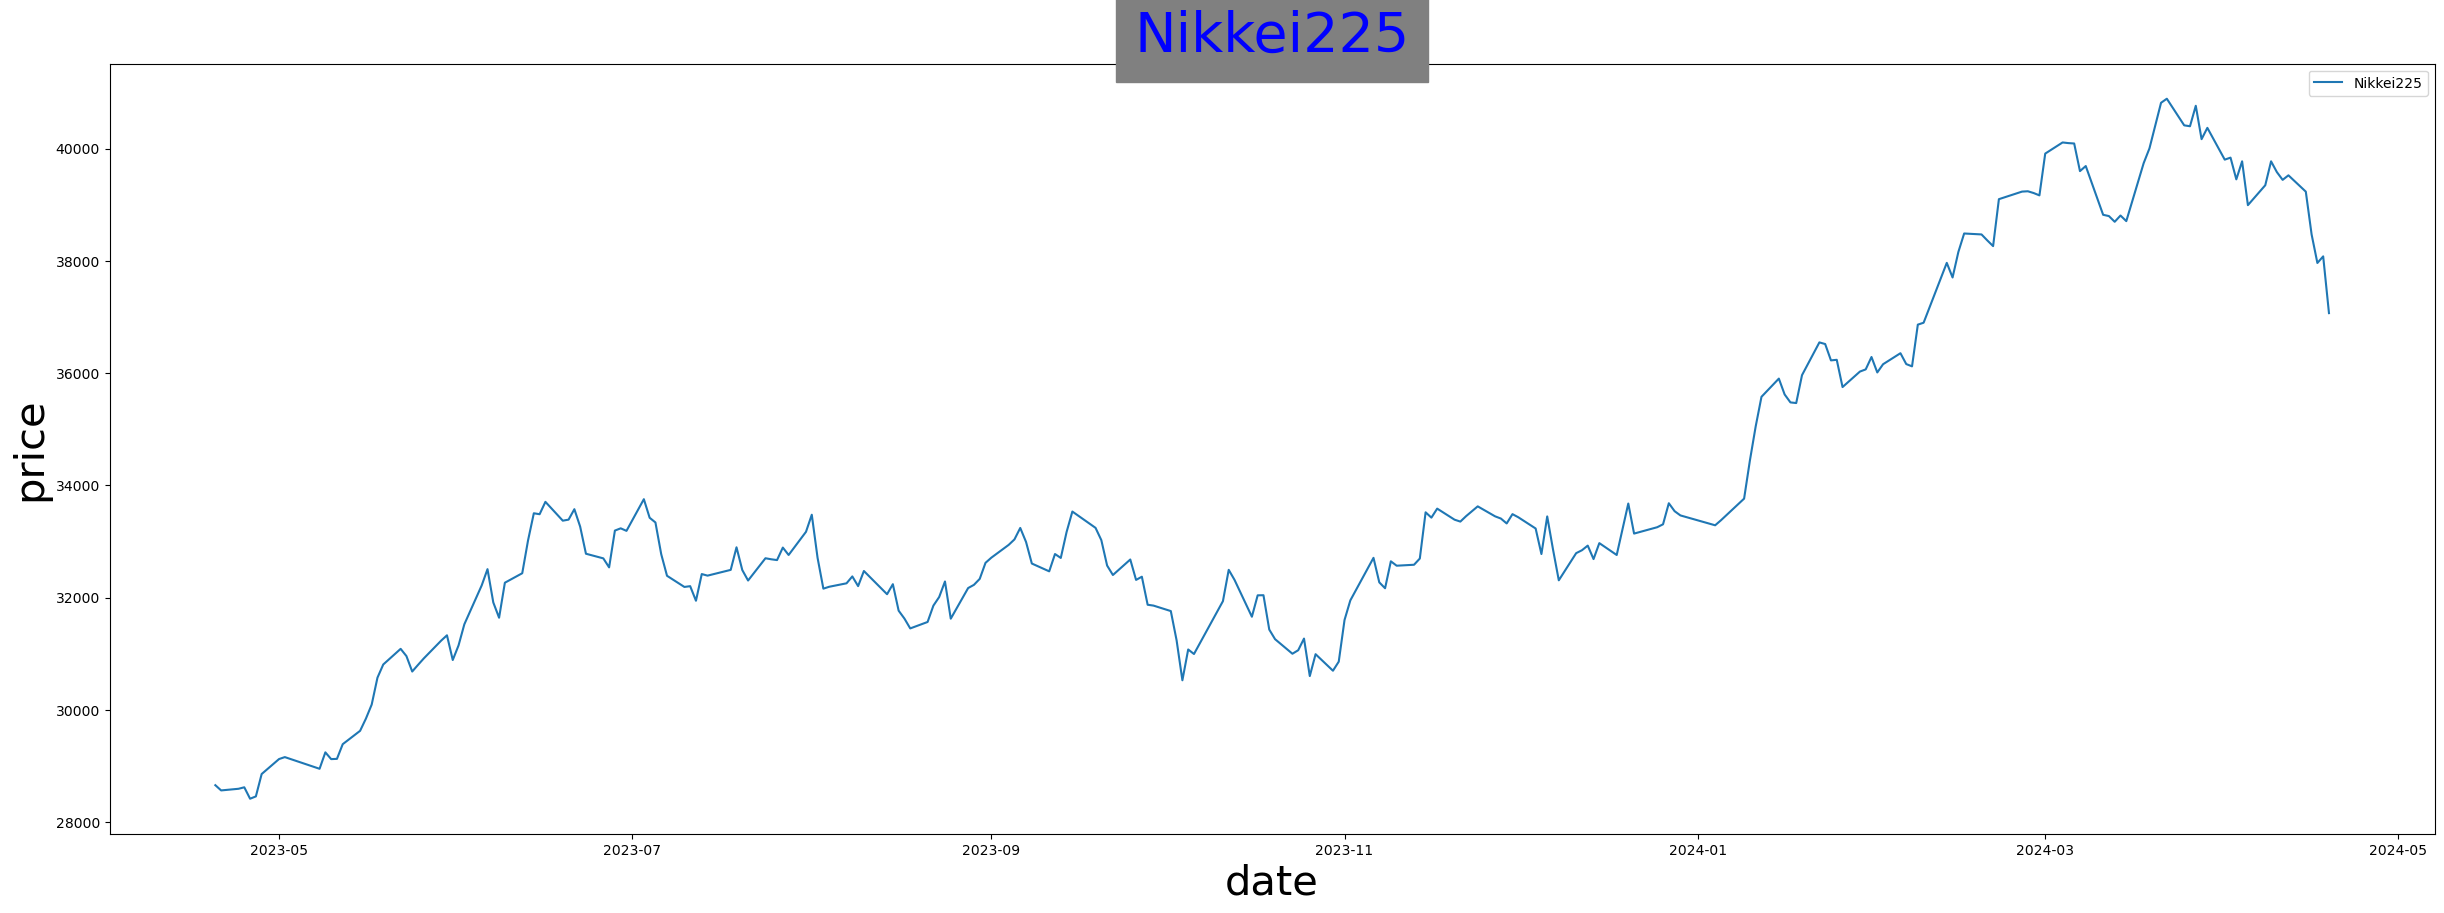

In [33]:
plt.figure(figsize=(30,10))
plt.plot(data,price,label='Nikkei225')
plt.title('Nikkei225', color='blue', backgroundcolor='gray', size=40, loc='center')
plt.xlabel('date',color='black', size=30)
plt.ylabel('price',color='black', size=30)
plt.legend()

In [ ]:
移動平均線のデータを追加

In [26]:
span_short=5
span_mid=25
span_long=50

df['sma_short'] = price.rolling(window=span_short).mean()
df['sma_mid'] = price.rolling(window=span_mid).mean()
df['sma_long'] = price.rolling(window=span_long).mean()

In [30]:
pd.set_option('display.max_rows', None)
df.head(100)

,Open,High,Low,Close,Adj Close,Volume,sma_short,sma_mid,sma_long
Date,,,,,,,,,
2023-04-20,28472.000000,28694.250000,28442.449219,28657.570312,28657.570312,56700000,NaN,NaN,NaN
2023-04-21,28590.550781,28778.369141,28527.800781,28564.369141,28564.369141,61400000,NaN,NaN,NaN
2023-04-24,28631.779297,28680.650391,28567.240234,28593.519531,28593.519531,50000000,NaN,NaN,NaN
2023-04-25,28697.730469,28806.689453,28609.769531,28620.070312,28620.070312,59300000,NaN,NaN,NaN
2023-04-26,28478.519531,28551.609375,28319.769531,28416.470703,28416.470703,68700000,28570.400000,NaN,NaN
2023-04-27,28340.589844,28459.730469,28241.669922,28457.679688,28457.679688,73600000,28530.421875,NaN,NaN
2023-04-28,28705.910156,28879.240234,28499.509766,28856.439453,28856.439453,104000000,28588.835938,NaN,NaN
2023-05-01,29058.050781,29145.890625,29016.830078,29123.179688,29123.179688,73400000,28694.767969,NaN,NaN
2023-05-02,29278.800781,29278.800781,29083.130859,29157.949219,29157.949219,63900000,28802.343750,NaN,NaN


移動平均線をグラフ化する

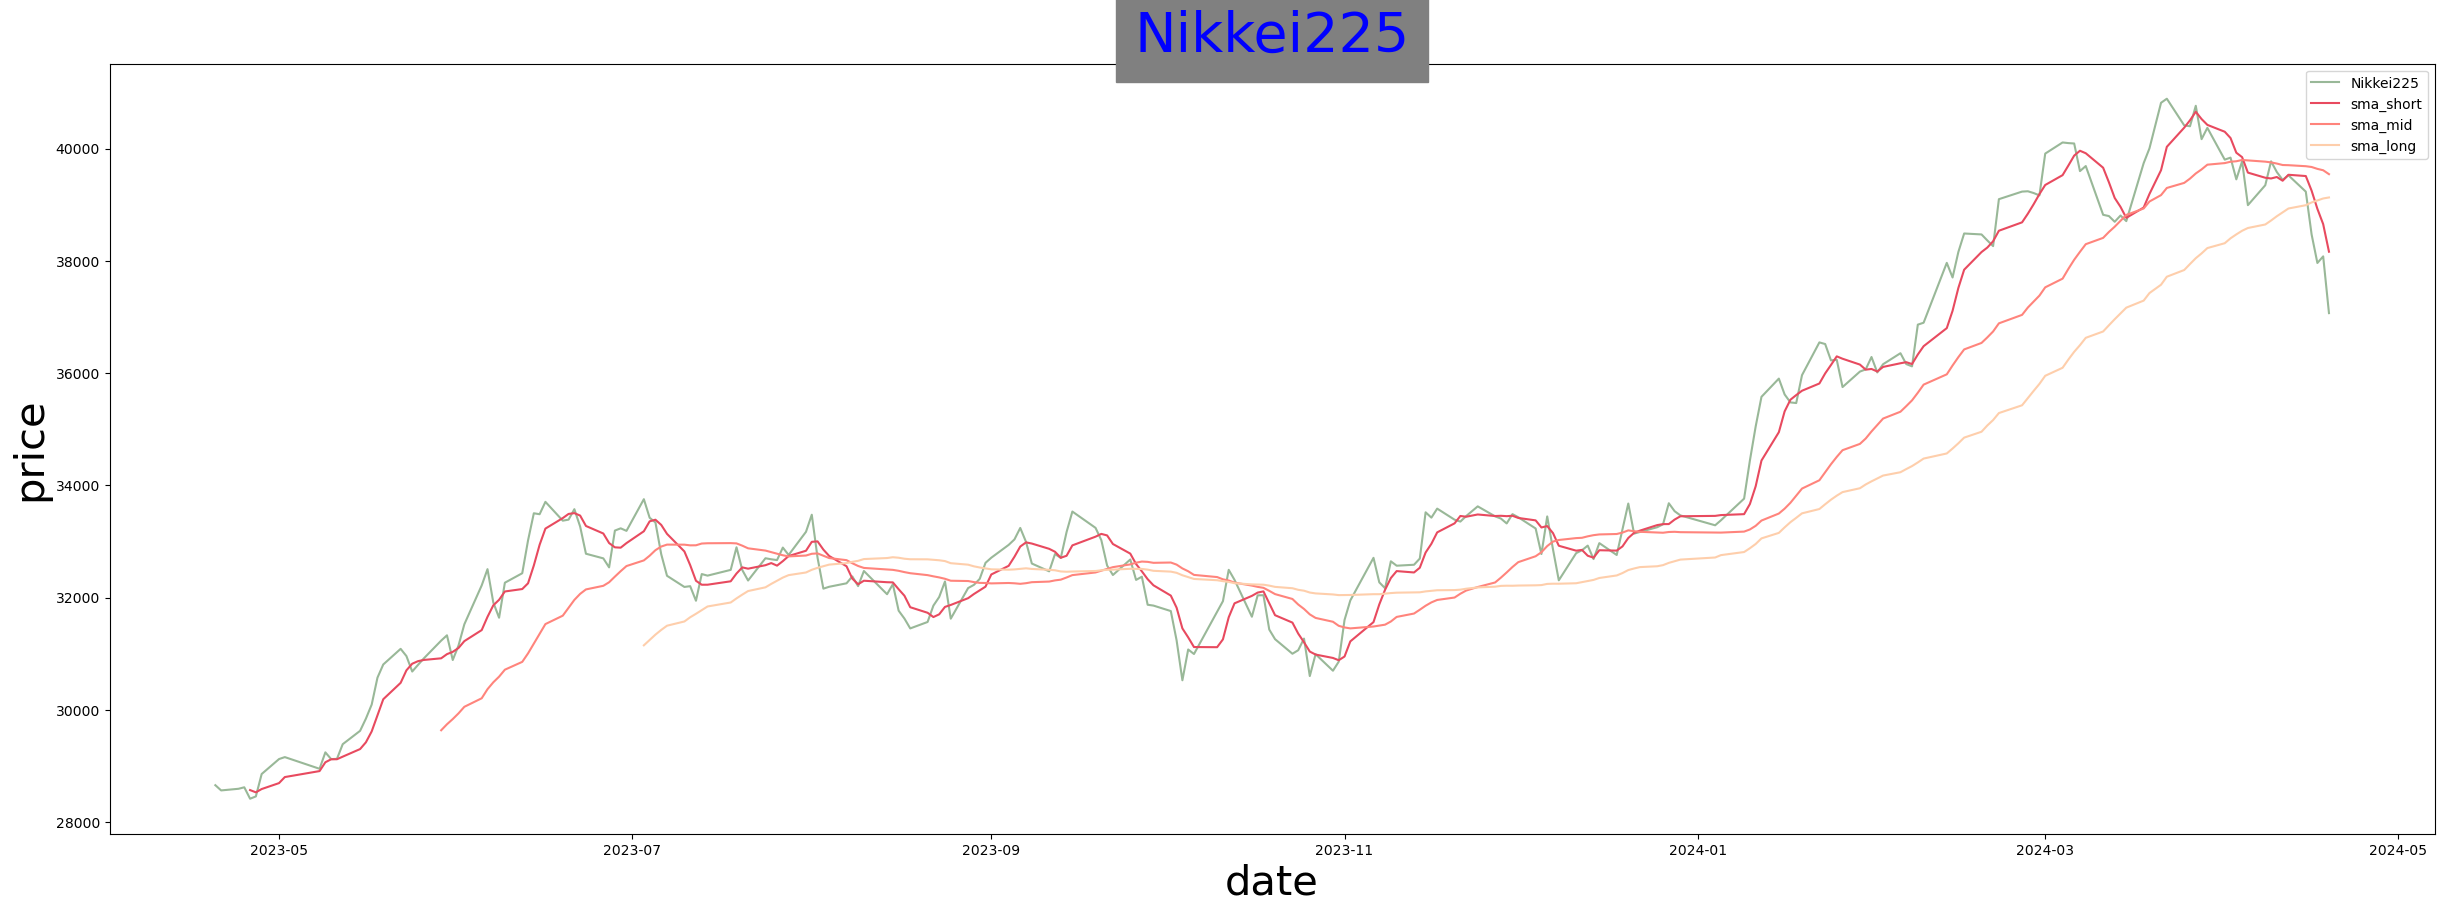

In [34]:
plt.figure(figsize=(30,10))
plt.plot(date,price,label='Nikkei225', color='#99b898')
plt.plot(date,df['sma_short'],label='sma_short', color='#e84a5f')
plt.plot(date,df['sma_mid'],label='sma_mid', color='#ff847c')
plt.plot(date,df['sma_long'],label='sma_long', color='#feceab')


plt.title('Nikkei225', color='blue', backgroundcolor='gray', size=40, loc='center')
plt.xlabel('date',color='black', size=30)
plt.ylabel('price',color='black', size=30)
plt.legend()